# <font color = lightcoral>Understand current parsing and windowing logic and device new one
>    
>Startover

## <font color = grey> Admin

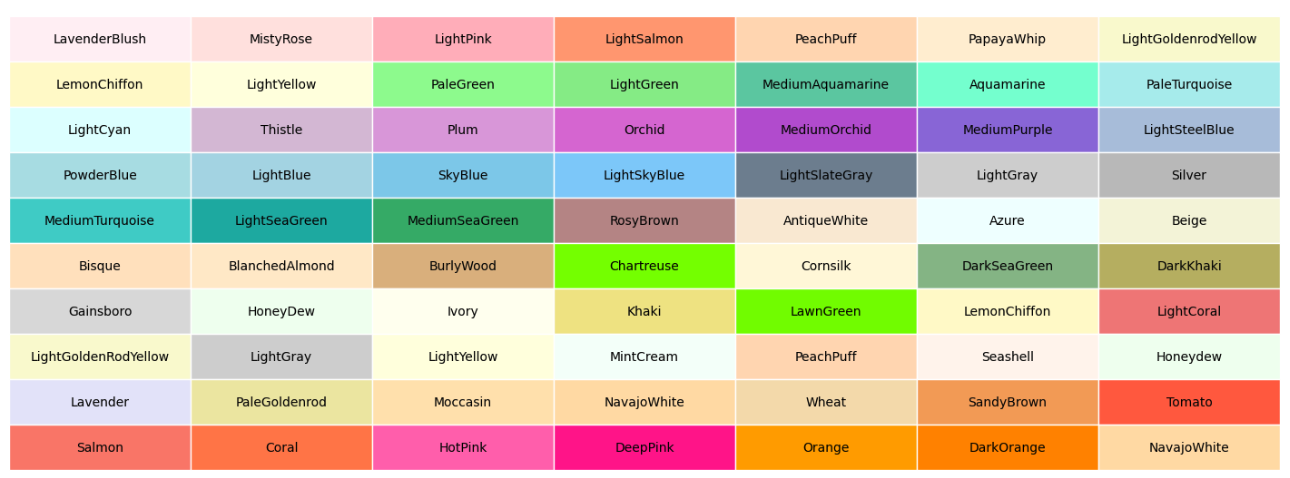

In [ ]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [ ]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

___
# <font color = darkkhaki> (B) EDA

## <font color = lightsteelblue>EDA of Template File

In [ ]:
import pandas as pd
import time

# Define the path to the CSV file
# file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_templates.csv"

# file_path = "/root/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_templates.csv"

file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_templates.csv')

# /mnt/efs-w210-capstone/200015/

# Start timing
start_time = time.time()

# Read the CSV file
df = pd.read_csv(file_path)

# Section 1: Preview
print("\n" + "*"*100)
print("********************** Section 1: Preview ******************************************")
print("*"*100 + "\n")
display(df.head())

# Section 2: Shape of the DataFrame
print("\n" + "*"*100)
print("********************** Section 2: Shape of the DataFrame ****************************")
print("*"*100 + "\n")
print(df.shape)

# Section 3: DataFrame Information
print("\n" + "*"*100)
print("********************** Section 3: DataFrame Information ****************************")
print("*"*100 + "\n")
print(df.info())

# Section 4: Summary Statistics (without scientific notation)
print("\n" + "*"*100)
print("********************** Section 4: Summary Statistics *******************************")
print("*"*100 + "\n")
pd.options.display.float_format = '{:,.0f}'.format
print(df.describe())

# Section 5: Unique Event IDs
print("\n" + "*"*100)
print("********************** Section 5: Unique Event IDs *********************************")
print("*"*100 + "\n")
print(df['EventId'].nunique())

# Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
print("\n" + "*"*100)
print("********************** Section 7: Most Frequent Event Templates *********************")
print("*"*100 + "\n")
df_sorted = df.sort_values(by='Occurrences', ascending=False).reset_index()
df_sorted.index += 1  # Make the index start from 1
df_sorted.rename(columns={'index': 'RowNum'}, inplace=True)
print(df_sorted[['EventId', 'RowNum', 'EventTemplate', 'Occurrences']].head())

# Section 8: Relevant Statistics
print("\n" + "*"*100)
print("********************** Section 8: Relevant Statistics *******************************")
print("*"*100 + "\n")

# Total number of events
total_events = df['Occurrences'].sum()
print(f"Total number of events: {total_events}")

# Average occurrences per event template
average_occurrences = df['Occurrences'].mean()
print(f"Average occurrences per event template: {average_occurrences:.2f}")

# Maximum occurrences of a single event template
max_occurrences = df['Occurrences'].max()
max_event_template = df[df['Occurrences'] == max_occurrences]['EventTemplate'].values[0]
print(f"Maximum occurrences of a single event template: {max_occurrences} (Event Template: {max_event_template})")

# Minimum occurrences of a single event template
min_occurrences = df['Occurrences'].min()
min_event_template = df[df['Occurrences'] == min_occurrences]['EventTemplate'].values[0]
print(f"Minimum occurrences of a single event template: {min_occurrences} (Event Template: {min_event_template})")

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)

___
# <font color = darkkhaki> (C) EDA

## <font color = lightsteelblue>EDA of Parsed File

---

In [ ]:
import pandas as pd
import time

# Define the path to the CSV file
# file_path = "/root/08.GIT_Repos_REF/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv"

# file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/BGL.log_structured.csv')
file_path = os.path.join(base_dir, '/mnt/efs-w210-capstone/200015/08.GIT_Repos_Anomaly_Detection/23.Library_Transformers_Logbert_HelenG_BGL/output/bgl/20240701_BGL_Log_Structuted_v1.00.csv')

# Start timing
start_time = time.time()

# Read the CSV file
df = pd.read_csv(file_path)

# Section 1: Preview
print("\n" + "*"*100)
print("********************** Section 1: Preview ******************************************")
print("*"*100 + "\n")
display(df.head())

# Section 2: Shape of the DataFrame
print("\n" + "*"*100)
print("********************** Section 2: Shape of the DataFrame ****************************")
print("*"*100 + "\n")
print(df.shape)

# Section 3: DataFrame Information
print("\n" + "*"*100)
print("********************** Section 3: DataFrame Information ****************************")
print("*"*100 + "\n")
print(df.info())

# Section 4: Summary Statistics (without scientific notation)
print("\n" + "*"*100)
print("********************** Section 4: Summary Statistics *******************************")
print("*"*100 + "\n")
pd.options.display.float_format = '{:,.0f}'.format
print(df.describe())

# Section 5: Unique Event Templates
print("\n" + "*"*100)
print("********************** Section 5: Unique Event Templates ***************************")
print("*"*100 + "\n")
print(df['EventTemplate'].nunique())

# Section 6: Count of Each Event Template
print("\n" + "*"*100)
print("********************** Section 6: Count of Each Event Template *********************")
print("*"*100 + "\n")
print(df['EventTemplate'].value_counts().head())

# Section 7: Most Frequent Event Templates with Counts (ordered by occurrences)
print("\n" + "*"*100)
print("********************** Section 7: Most Frequent Event Templates *********************")
print("*"*100 + "\n")
df_sorted = df.groupby(['EventId', 'EventTemplate']).size().reset_index(name='Occurrences')
df_sorted = df_sorted.sort_values(by='Occurrences', ascending=False).reset_index(drop=True)
df_sorted.index += 1  # Make the index start from 1
print(df_sorted.head())

# Section 8: Alert Analysis
print("\n" + "*"*100)
print("********************** Section 8: Alert Analysis ************************************")
print("*"*100 + "\n")

# Count of normal vs alert logs
label_counts = df['Label'].value_counts()
print(f"Normal logs: {label_counts.get('-', 0)}")
print(f"Alert logs: {label_counts.sum() - label_counts.get('-', 0)}")

# Most frequent labels for alerts
alert_labels = df[df['Label'] != '-']['Label'].value_counts().head()
print("\nMost frequent alert labels:")
print(alert_labels)

# Distribution of alert levels
alert_levels = df[df['Label'] != '-']['Level'].value_counts()
print("\nDistribution of alert levels:")
print(alert_levels)

# Section 9: Label and Alert Level Analysis
print("\n" + "*"*100)
print("********************** Section 9: Label and Alert Level Analysis ********************")
print("*"*100 + "\n")

# Distribution of values in the Label column with an indicator for normal or alert
df['LogType'] = df['Label'].apply(lambda x: 'Normal' if x == '-' else 'Alert')
label_distribution = df.groupby(['LogType', 'Label']).size()
print("\nDistribution of values in the Label column with an indicator for normal or alert:")
display(label_distribution)

# Distribution of values in the Level column for alerts
alert_level_distribution = df[df['LogType'] == 'Alert'].groupby('Level').size().reset_index(name='count')
alert_level_distribution['LogType'] = 'Alert'
print("\nDistribution of values in the Level column for alerts:")
display(alert_level_distribution[['LogType', 'Level', 'count']])

# Distribution of values in the Level column for normal logs with an indicator for normal or alert
normal_level_distribution = df[df['LogType'] == 'Normal'].groupby('Level').size().reset_index(name='count')
normal_level_distribution['LogType'] = 'Normal'
print("\nDistribution of values in the Level column for normal logs with an indicator for normal or alert:")
display(normal_level_distribution[['LogType', 'Level', 'count']])

# Section 10: Combined LogType, Label, Level, and Count
print("\n" + "*"*100)
print("********************** Section 10: Combined LogType, Label, Level, and Count ********")
print("*"*100 + "\n")

combined_distribution = df.groupby(['LogType', 'Label', 'Level']).size().reset_index(name='count')
combined_distribution = combined_distribution.sort_values(by=['LogType', 'count', 'Label'], ascending=[False, False, True])
display(combined_distribution)

# Section 11: Count Unique Values in Each Column
print("\n" + "*"*100)
print("********************** Section 11: Count Unique Values in Each Column ****************")
print("*"*100 + "\n")
print(df.nunique())

# Section 12: Random Sample of 10 Alert Rows
print("\n" + "*"*100)
print("********************** Section 12: Random Sample of 10 Alert Rows ********************")
print("*"*100 + "\n")
alert_rows = df[df['Label'] != '-']
sample_alert_rows = alert_rows.sample(n=10) if len(alert_rows) >= 10 else alert_rows
display(sample_alert_rows)

# Section 13: Analysis of Rows for Normal and Alert Labels
print("\n" + "*"*100)
print("********************** Section 13: Analysis of Rows for Normal and Alert Labels ********")
print("*"*100 + "\n")

# Grouping by LogType to count rows for Normal and Alert logs
logtype_counts = df['LogType'].value_counts()
total_logs = logtype_counts.sum()
normal_percentage = (logtype_counts['Normal'] / total_logs) * 100
alert_percentage = (logtype_counts['Alert'] / total_logs) * 100

print(f"Normal logs: {logtype_counts['Normal']} ({normal_percentage:.2f}%)")
print(f"Alert logs: {logtype_counts['Alert']} ({alert_percentage:.2f}%)")

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)

___
# <font color = darkkhaki> (D). Windowing Logic - Current

## <font color = lightsteelblue>TBD

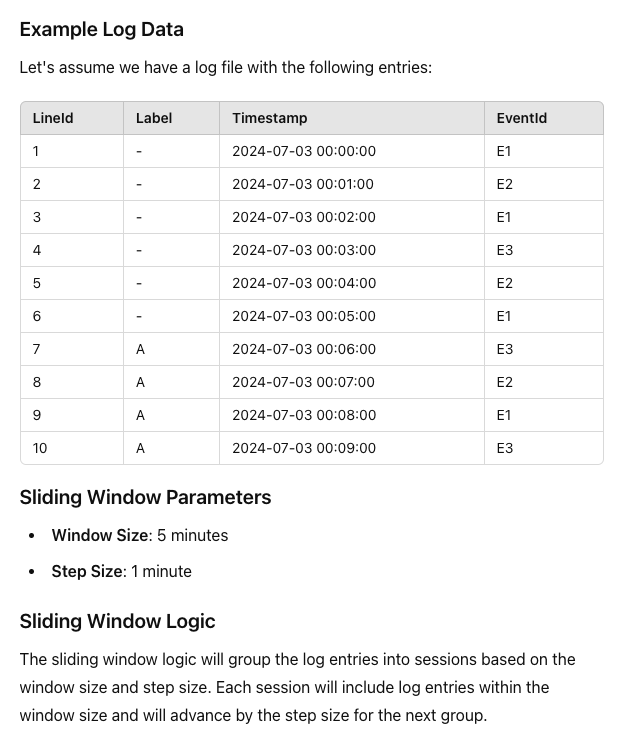

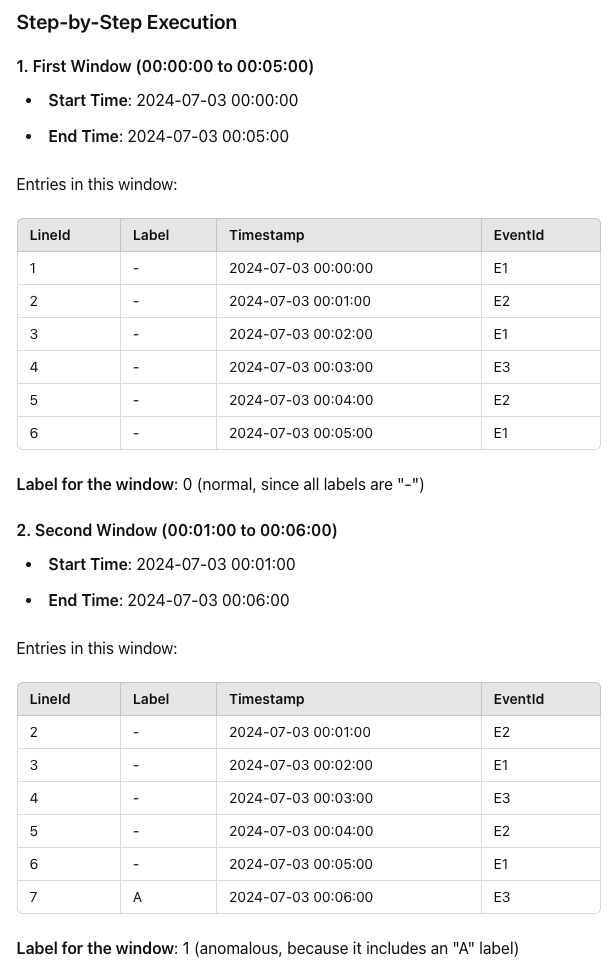

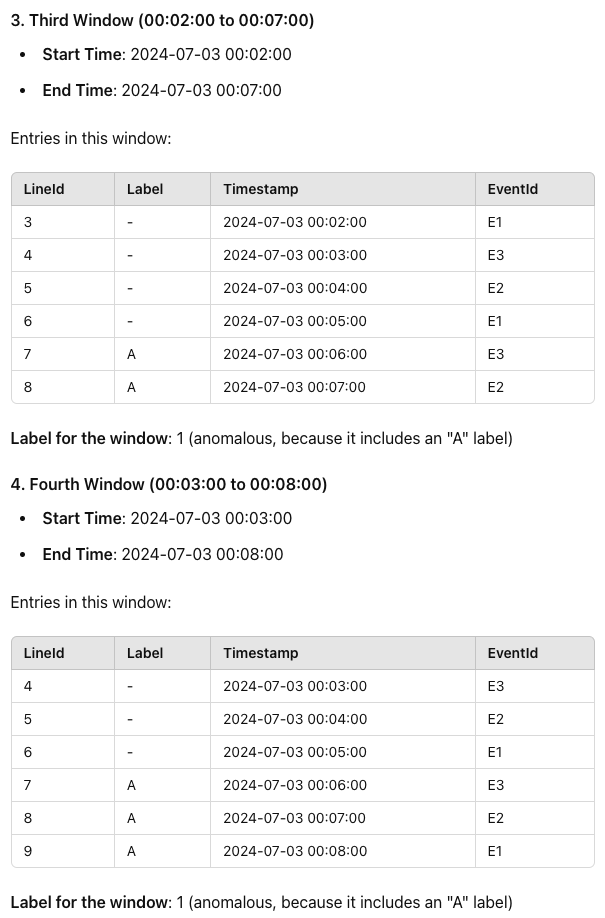

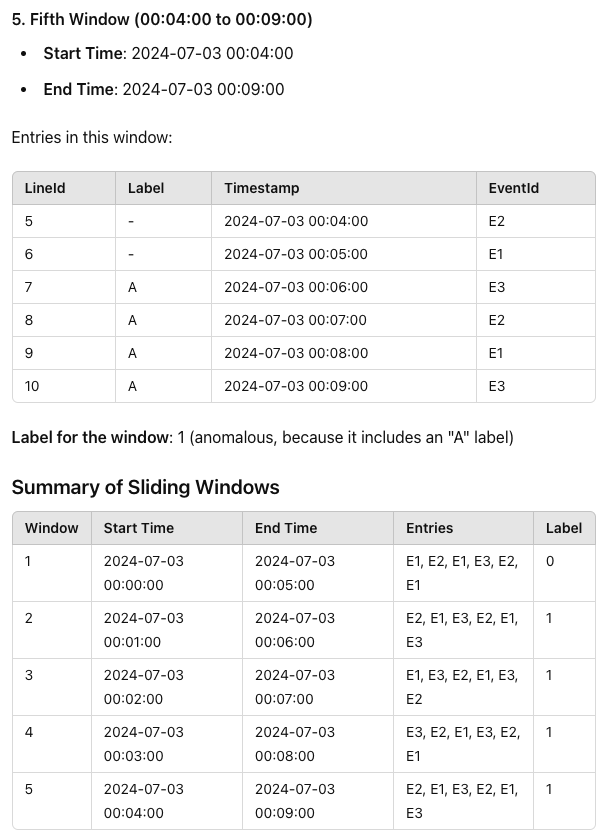

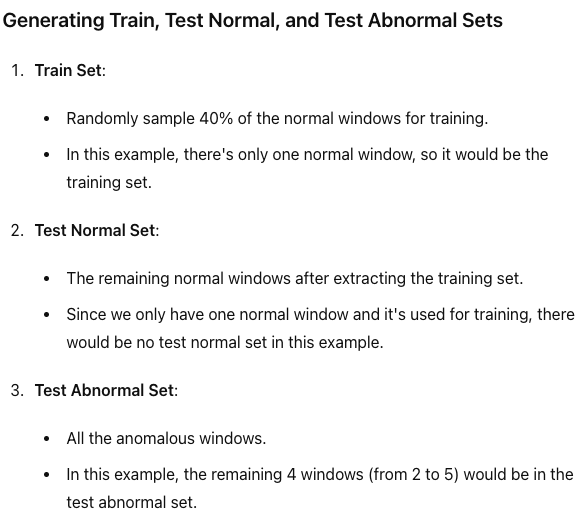

# <font color = tomato> Workflow Summary

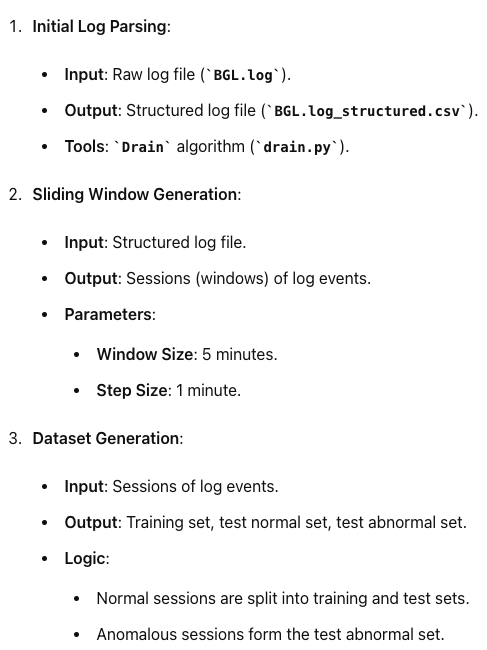

## <font color = teal>Detailed Steps

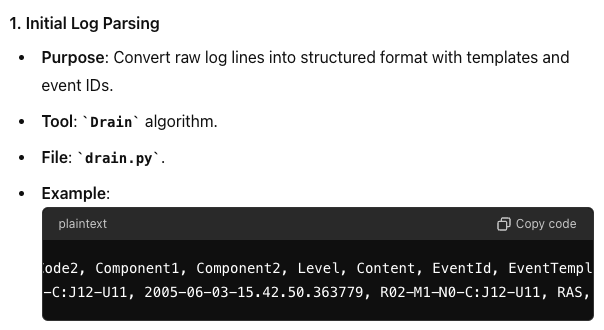

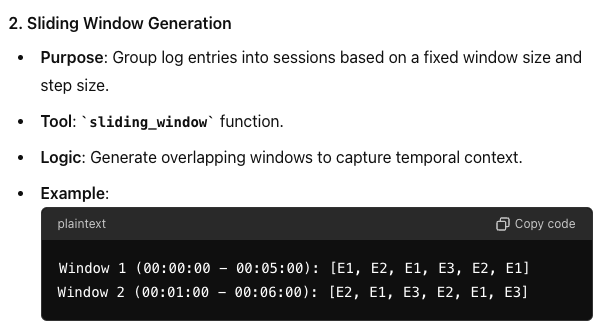

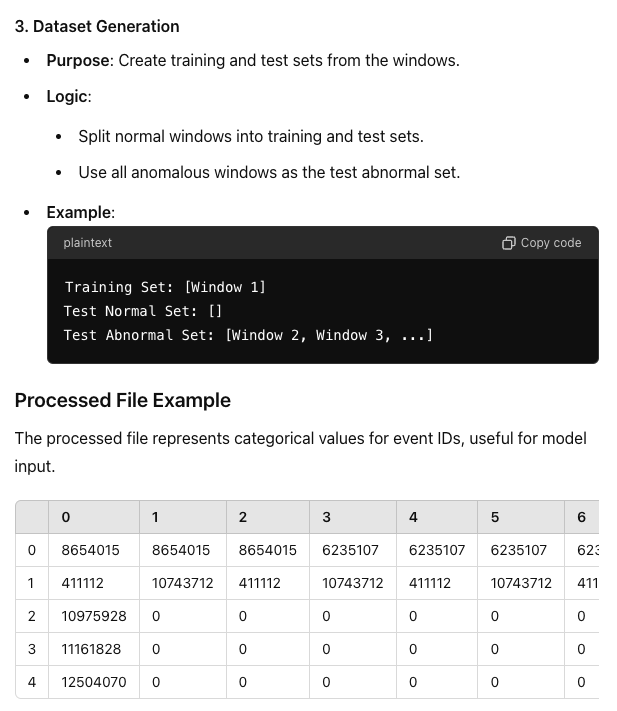

# <font color = tomato> Logic Change

### <font color = blue> Available Data

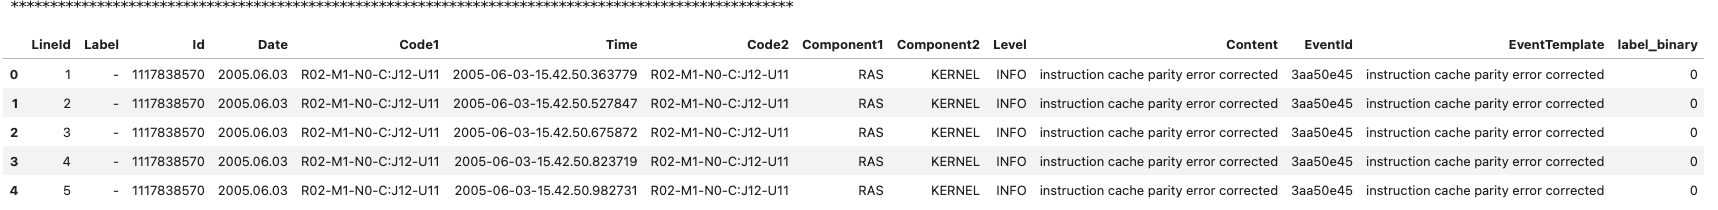

# <font color = tomato> Code WIP

> 1. Data Preparation
Use the sliding window approach to generate windows and then create sequences from these windows.



In [ ]:
# import pandas as pd
# from logdeep.dataset.session import sliding_window

# # Load structured log data
# df = pd.read_csv(f'{output_dir}{log_file}_structured.csv')

# # Convert time to datetime and calculate timestamp
# df['datetime'] = pd.to_datetime(df['Time'], format='%Y-%m-%d-%H.%M.%S.%f')
# df["Label"] = df["Label"].apply(lambda x: int(x != "-"))
# df['timestamp'] = df["datetime"].values.astype(np.int64) // 10 ** 9

# # Sliding window aggregation
# window_size = 5 * 60  # 5 minutes in seconds
# step_size = 1 * 60  # 1 minute in seconds

# deeplog_df = sliding_window(df[["timestamp", "Label", "EventId", "deltaT"]],
#                             para={"window_size": window_size, "step_size": step_size})

# # Extract features and labels
# features = deeplog_df.drop(columns=["Label"]).values
# labels = deeplog_df["Label"].values

# # Create sequences of windows
# sequence_length = 10  # Number of windows to use for prediction
# X = []
# y = []

# for i in range(len(features) - sequence_length):
#     X.append(features[i:i + sequence_length])
#     y.append(labels[i + sequence_length])

# X = np.array(X)
# y = np.array(y)

# print(X.shape, y.shape)  # Shape should be (num_sequences, sequence_length, num_features)


> 2. Model Design
Design an LSTM model to handle the sequential nature of the data.

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(64, input_shape=(sequence_length, X.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

> 3. Training
Train the model using the sequences.

In [1]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {accuracy:.4f}')

> 4. Evaluation
Evaluate the model's performance.

In [2]:
# import matplotlib.pyplot as plt

# # Plot training & validation accuracy values
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# <font color = tomato> Logic Change - Detail

### <font color = teal> Fixed Window

right but that doesnt work in reality -- the data spans 6 months and the logs are captured in micro-second detail

the goal is being able to predict the label, say 5 minutes before the event, In essence

training window: 12:01 - 12:50 (10 X 5 minute windows) --> let us call this multiplier as 'training_factor' 
interval window 12:51 - 12:55 ( 1 X 5 minute window) --> let us call this multiplier as 'interval_factor'
test window: 12:56 - 1:00 ( 1 X 5 minute window) --> this is the test_factor

next training window: 1:01 - 1:50
next interval window: 1:51 - 1:55
next test window: 1:56 - 2:00

this way, we ensure there is no data leakage between the two windows.

Do you have any other suggestions on how to design this data engg?


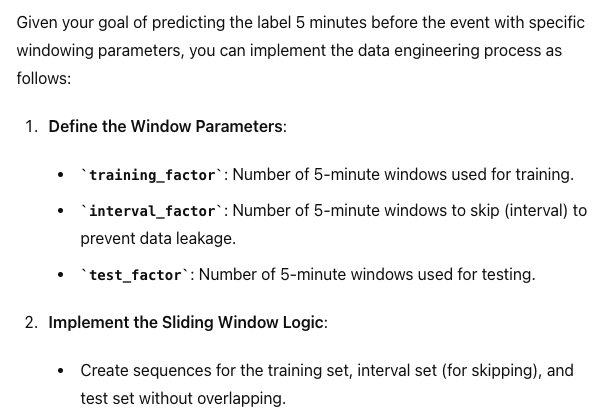

In [3]:
# import pandas as pd
# import numpy as np

# # Assuming df is the dataframe containing the parsed log data, sorted by timestamp
# df = pd.read_csv('path_to_your_structured_log.csv')  # Replace with actual path

# # Convert timestamp to datetime
# df['datetime'] = pd.to_datetime(df['Time'], format='%Y-%m-%d-%H.%M.%S.%f')
# df['timestamp'] = df['datetime'].values.astype(np.int64) // 10 ** 9

# # Define window parameters in minutes
# training_factor = 10
# interval_factor = 1
# test_factor = 1
# window_size = 5 * 60  # 5 minutes in seconds

# # Define a function to create sliding windows
# def create_time_series_windows(df, training_factor, interval_factor, test_factor, window_size):
#     training_data = []
#     test_data = []
#     current_position = 0

#     while current_position + (training_factor + interval_factor + test_factor) * window_size < len(df):
#         # Define window boundaries
#         training_start = current_position
#         training_end = training_start + training_factor * window_size

#         interval_start = training_end
#         interval_end = interval_start + interval_factor * window_size

#         test_start = interval_end
#         test_end = test_start + test_factor * window_size

#         # Extract windows
#         training_window = df.iloc[training_start:training_end]
#         test_window = df.iloc[test_start:test_end]

#         # Store the windows
#         training_data.append(training_window)
#         test_data.append(test_window)

#         # Move to the next position
#         current_position = test_end

#     return training_data, test_data

# # Create the windows
# training_data, test_data = create_time_series_windows(df, training_factor, interval_factor, test_factor, window_size)

# # Optionally, concatenate the windows back into a DataFrame
# training_df = pd.concat(training_data, ignore_index=True)
# test_df = pd.concat(test_data, ignore_index=True)

# # Save the training and test sets
# training_df.to_csv('training_data.csv', index=False)
# test_df.to_csv('test_data.csv', index=False)

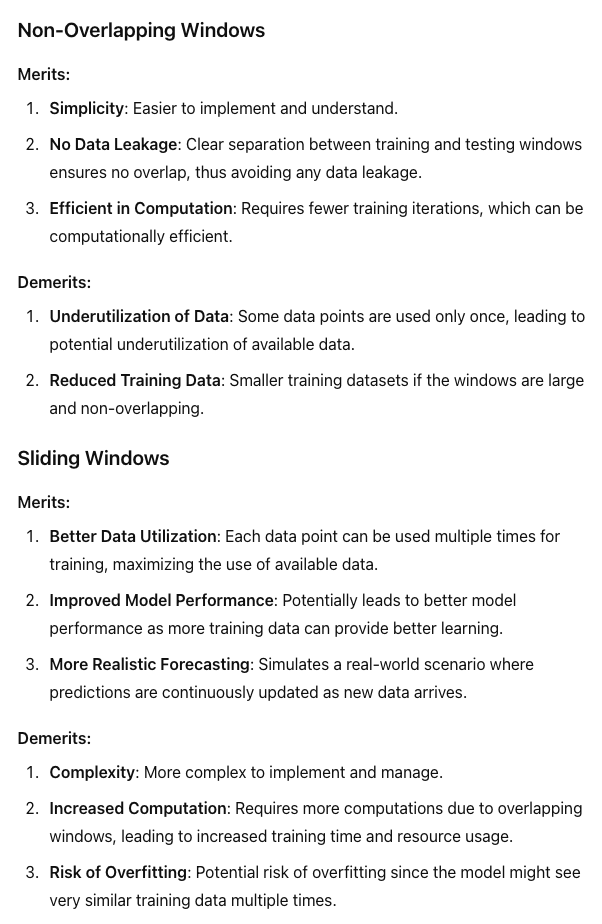

### <font color = teal> Sliding Window

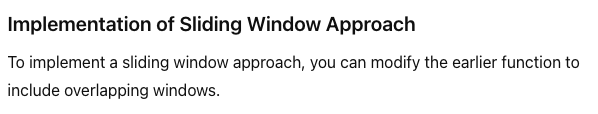

In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming df is the dataframe containing the parsed log data, sorted by timestamp
# df = pd.read_csv('path_to_your_structured_log.csv')  # Replace with actual path

# # Convert timestamp to datetime
# df['datetime'] = pd.to_datetime(df['Time'], format='%Y-%m-%d-%H.%M.%S.%f')
# df['timestamp'] = df['datetime'].values.astype(np.int64) // 10 ** 9

# # Define window parameters in minutes
# training_factor = 10
# interval_factor = 1
# test_factor = 1
# window_size = 5 * 60  # 5 minutes in seconds

# # Define a function to create sliding windows
# def create_sliding_windows(df, training_factor, interval_factor, test_factor, window_size):
#     training_data = []
#     test_data = []
#     current_position = 0

#     total_window_size = (training_factor + interval_factor + test_factor) * window_size

#     while current_position + total_window_size < len(df):
#         # Define window boundaries
#         training_start = current_position
#         training_end = training_start + training_factor * window_size

#         interval_start = training_end
#         interval_end = interval_start + interval_factor * window_size

#         test_start = interval_end
#         test_end = test_start + test_factor * window_size

#         # Extract windows
#         training_window = df.iloc[training_start:training_end]
#         test_window = df.iloc[test_start:test_end]

#         # Store the windows
#         training_data.append(training_window)
#         test_data.append(test_window)

#         # Move to the next position (sliding window)
#         current_position += window_size  # Slide by window_size seconds

#     return training_data, test_data

# # Create the windows
# training_data, test_data = create_sliding_windows(df, training_factor, interval_factor, test_factor, window_size)

# # Optionally, concatenate the windows back into a DataFrame
# training_df = pd.concat(training_data, ignore_index=True)
# test_df = pd.concat(test_data, ignore_index=True)

# # Save the training and test sets
# training_df.to_csv('training_data.csv', index=False)
# test_df.to_csv('test_data.csv', index=False)
